In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
import IPython
from IPython.display import display
from PIL import Image
dataset='/kaggle/input/flowers/flowers'
x=[]
y = []
for flower_name in os.listdir(dataset):
    for image_path in os.listdir(dataset+'/'+flower_name):
        img=dataset+'/'+flower_name+'/'+image_path
        image = cv2.imread(img)
        image = cv2.resize(image, (224,224))
        x.append(image)
        y.append(flower_name)

In [ ]:
x=np.array(x)
y=np.array(y)
print(x.shape)
y

(15740, 224, 224, 3)


array(['astilbe', 'astilbe', 'astilbe', ..., 'iris', 'iris', 'iris'],
      dtype='<U16')

In [ ]:
from sklearn.preprocessing import LabelBinarizer
# perform one-hot encoding on the labels
lb = LabelBinarizer()
yy = lb.fit_transform(y)

In [ ]:
yy

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.model_selection import train_test_split
(trainX, testX, trainY, testY) = train_test_split(x,yy,test_size=0.33, stratify=yy, random_state=42)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Input,Conv2D,Dropout,MaxPooling2D,Flatten
model=Sequential()
model.add(Input(shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(16,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 111, 111, 64)      0         
_________________________________________________________________
dropout (Dropout)            (None, 111, 111, 64)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 109, 109, 64)      36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 52, 52, 128)       7

In [ ]:
from keras import callbacks
early_stopping = callbacks.EarlyStopping(
    patience = 15,
    restore_best_weights = True,
    verbose = 1,
    min_delta = 0.001,
)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
result=model.fit(trainX, trainY, batch_size=64, validation_data = (testX, testY), steps_per_epoch = 400, epochs=80,shuffle=True,callbacks = [early_stopping])

Epoch 1/80
400/400 [==============================] - 42s 85ms/step - loss: 3.0467 - accuracy: 0.1548 - val_loss: 2.3503 - val_accuracy: 0.2114
Epoch 2/80
400/400 [==============================] - 31s 78ms/step - loss: 1.8794 - accuracy: 0.3408 - val_loss: 2.1426 - val_accuracy: 0.2620
Epoch 3/80
400/400 [==============================] - 31s 78ms/step - loss: 1.6350 - accuracy: 0.4419 - val_loss: 1.9190 - val_accuracy: 0.3602
Epoch 4/80
400/400 [==============================] - 31s 78ms/step - loss: 1.4432 - accuracy: 0.5140 - val_loss: 1.5935 - val_accuracy: 0.4764
Epoch 5/80
400/400 [==============================] - 31s 78ms/step - loss: 1.3713 - accuracy: 0.5437 - val_loss: 1.4703 - val_accuracy: 0.5201
Epoch 6/80
400/400 [==============================] - 31s 78ms/step - loss: 1.2273 - accuracy: 0.5887 - val_loss: 1.3842 - val_accuracy: 0.5613
Epoch 7/80
400/400 [==============================] - 31s 78ms/step - loss: 1.1472 - accuracy: 0.6177 - val_loss: 1.3710 - val_accuracy:

In [ ]:
model.evaluate(testX, testY)

163/163 [==============================] - 2s 11ms/step - loss: 1.0817 - accuracy: 0.6597


[1.0816582441329956, 0.659672737121582]

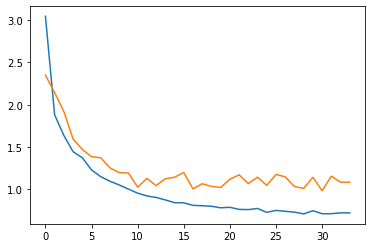

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

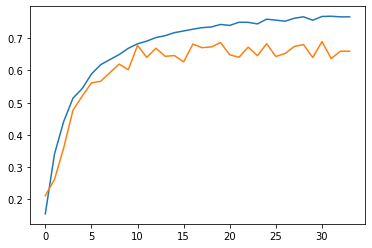

In [ ]:
plt.plot(result.history['accuracy'])
plt.plot(result.history['val_accuracy'])